In [3]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#First, read in data
var_ks = pd.read_csv("/Users/gregoryislas/Documents/Mobilized/IRI_Var_Params2/varying_k_s.csv", header=0)
var_ku = pd.read_csv("/Users/gregoryislas/Documents/Mobilized/IRI_Var_Params2/varying_k_u.csv", header=0)
var_ms = pd.read_csv("/Users/gregoryislas/Documents/Mobilized/IRI_Var_Params2/varying_m_s.csv", header=0)
var_mu = pd.read_csv("/Users/gregoryislas/Documents/Mobilized/IRI_Var_Params2/varying_m_u.csv", header=0)
var_cs = pd.read_csv("/Users/gregoryislas/Documents/Mobilized/IRI_Var_Params2/varying_c_s.csv", header=0)


In [5]:
list_dfs = [var_ks, var_ku, var_ms, var_mu, var_cs]

In [6]:
var_ks.head(110)

,True_K_S,True_K_S_Ratio,Input_K_S,Input_K_S_Ratio,True_IRI,Est_IRI,Est_IRI_Wrong_Parameter
0,3212.253,0.2,18709,0.483,1.498439,1.455086,1.560211
1,3212.253,0.2,18709,0.483,2.279541,2.227282,2.426299
2,3212.253,0.2,18709,0.483,1.675139,1.634912,1.835933
3,3212.253,0.2,18709,0.483,1.256988,1.231482,1.337766
4,3212.253,0.2,18709,0.483,2.049178,2.019426,2.131142
5,3212.253,0.2,18709,0.483,0.225174,0.219609,0.238797
6,3212.253,0.2,18709,0.483,0.839641,0.824280,0.901243
7,3212.253,0.2,18709,0.483,0.783427,0.771288,0.830641
8,3212.253,0.2,18709,0.483,1.538986,1.511196,1.638791
9,3212.253,0.2,18709,0.483,1.556966,1.521957,1.690780


In [7]:
def make_subplots(list_xs, list_ys, titles, num_cols, plot_type='line'):
    fig = plt.figure(figsize=(12, 8))
    
    num_rows = int(np.ceil(len(list_xs)/num_cols))
    for index in range(0, len(list_xs)):
        fig.add_subplot(num_rows, num_cols, index+1)
        if(plot_type == 'scatter'):
            plt.scatter(list_xs[index], list_ys[index])
        elif plot_type == 'hist':
            plt.hist(list_ys[index])
        else:
            plt.plot(list_xs[index], list_ys[index])
        plt.title(titles[index])
        plt.xlim(0, 20)
        plt.ylim(0, 20)

    fig.tight_layout()

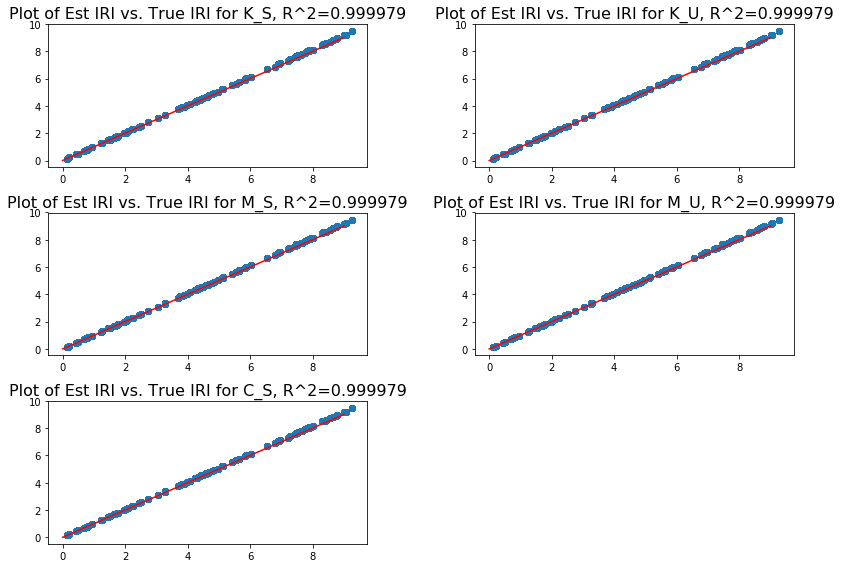

In [8]:
#first, let's plot all of the est_iri with the correct parameters
index = 1 # first feature
titles = ["K_S", "K_U", "M_S", "M_U", "C_S"]
my_fig = plt.figure(figsize=(12, 8)) # (width, height)
for ind in range(0, len(list_dfs)):
    
    my_fig.add_subplot(3, 2, index)
    x, y = list_dfs[index-1]["Est_IRI"], list_dfs[index-1]["True_IRI"]
    coef = np.corrcoef(x, y)[0][1]
    title = "Plot of Est IRI vs. True IRI for {0}, R^2={1}".format(titles[index-1], np.round(coef, 6))
    plt.scatter(x, y)
    plt.plot(np.arange(0, 10, 1), np.arange(0, 10, 1), 'r')
    plt.title(title, fontsize=16)
    index += 1
my_fig.tight_layout()

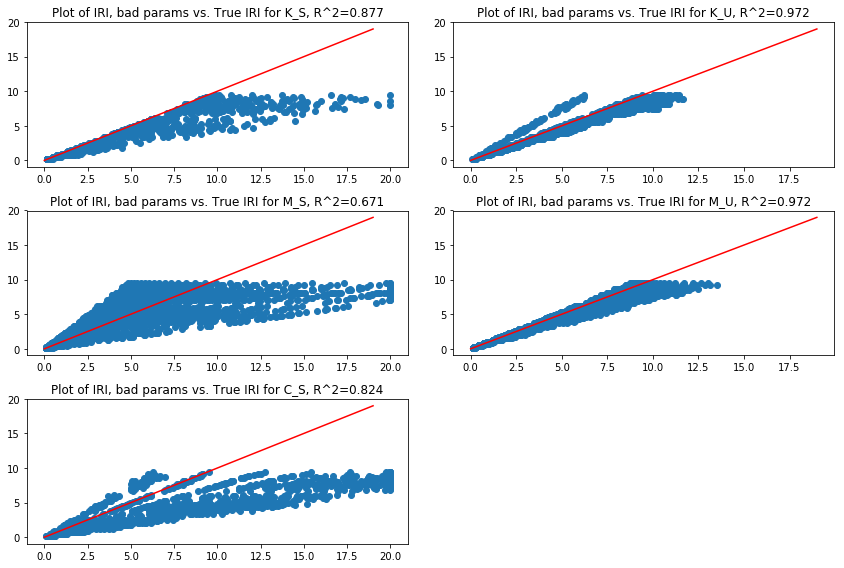

In [9]:
#As seen above, the inverse works really well when the parameters are correct... 
#However, how much does it vary when the parameters are wrong? Let's look and see below...
index = 1 # first feature
titles = ["K_S", "K_U", "M_S", "M_U", "C_S"]
my_fig = plt.figure(figsize=(12, 8)) # (width, height)
for ind in range(0, len(list_dfs)):
    
    my_fig.add_subplot(3, 2, index)
    x, y = list_dfs[index-1]["Est_IRI_Wrong_Parameter"], list_dfs[index-1]["True_IRI"]
    coef = np.corrcoef(x, y)[0][1]
    title = "Plot of IRI, bad params vs. True IRI for {0}, R^2={1}".format(titles[index-1], np.round(coef, 3))
    plt.scatter(x, y)
    plt.plot(np.arange(0, 20, 1), np.arange(0, 20, 1), 'r')
    plt.title(title, fontsize=12)
    index += 1
my_fig.tight_layout()

In [10]:
#Next, let's look at the MAPE for each one individually
def make_plots_w_err_rating(df, start, stop, step, col1, col2, title_prefix):
    list_xs, list_ys, titles = [], [], []
    for ratio in np.arange(start, stop, step):
        #print("Ratio is {0}".format(ratio))
        x, y = df.loc[df[col1] == np.round(ratio, 5), 'Est_IRI_Wrong_Parameter'], df.loc[df[col1] == np.round(ratio, 5), 'True_IRI']
        list_xs.append(x)
        list_ys.append(y)
        #print(y)
        #print(len(x))
        mape = 100/len(x) * np.sum(np.abs(y - x)/y)
        rmse = np.sqrt(np.sum((y-x)**2/len(x)))
        ratio_diff = ratio - df[col2].iloc[0]
        title = "{0}{1}, MAPE={2}, RMSE={3}".format(title_prefix, np.round(ratio_diff, 2), np.round(mape, 2), np.round(rmse, 2))
        titles.append(title)
    make_subplots(list_xs, list_ys, titles, 3, plot_type='scatter')

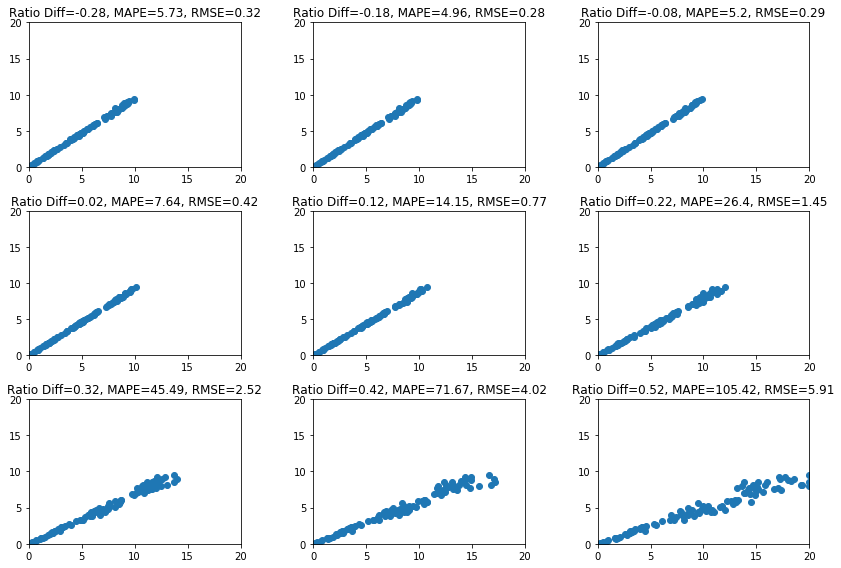

In [11]:
#First, look at k_S
make_plots_w_err_rating(var_ks, .2, 1.1, .1, "True_K_S_Ratio", "Input_K_S_Ratio", "Ratio Diff=")

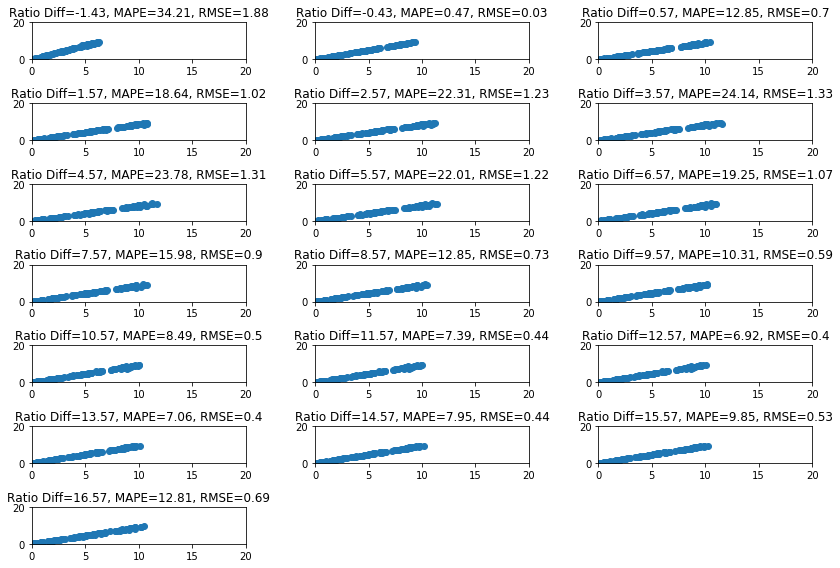

In [12]:
#Now, look at k_u
make_plots_w_err_rating(var_ku, 2, 21, 1, "True_K_U_Ratio", "Input_K_U_Ratio", "Ratio Diff=")

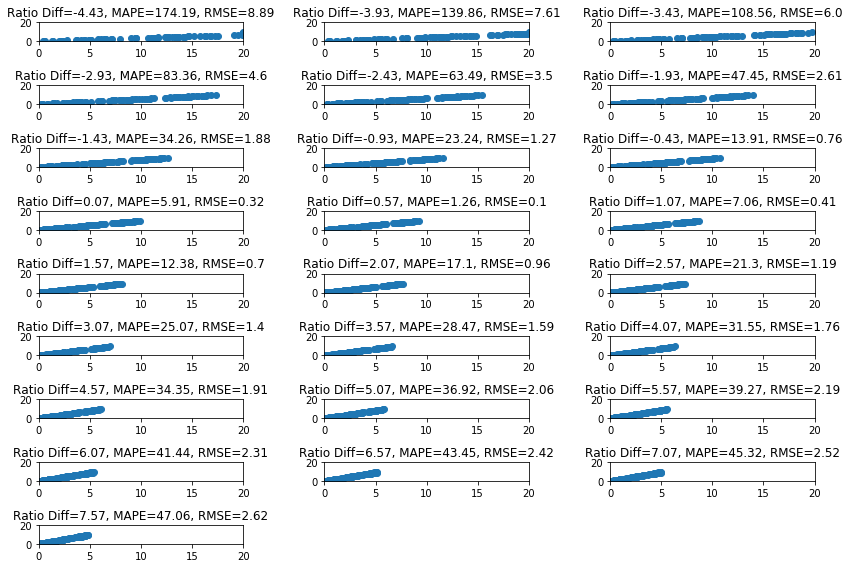

In [13]:
#Now, look at m_s
make_plots_w_err_rating(var_ms, 3, 15.5, .5, "True_M_S_M_U_Ratio", "Input_M_S_M_U_Ratio", "Ratio Diff=")

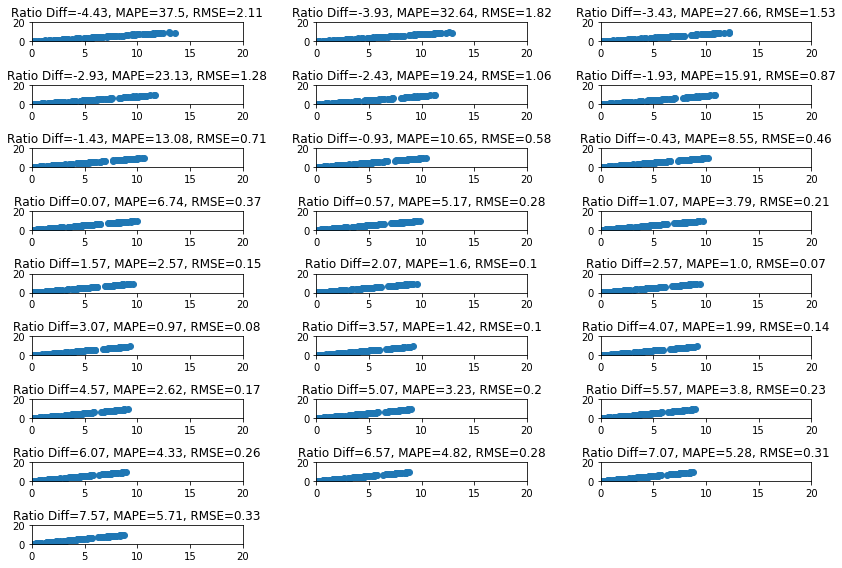

In [14]:
#Now, look at m_u
make_plots_w_err_rating(var_mu, 3, 15.5, .5, "True_M_S_M_U_Ratio", "Input_M_S_M_U_Ratio", "Ratio Diff=")

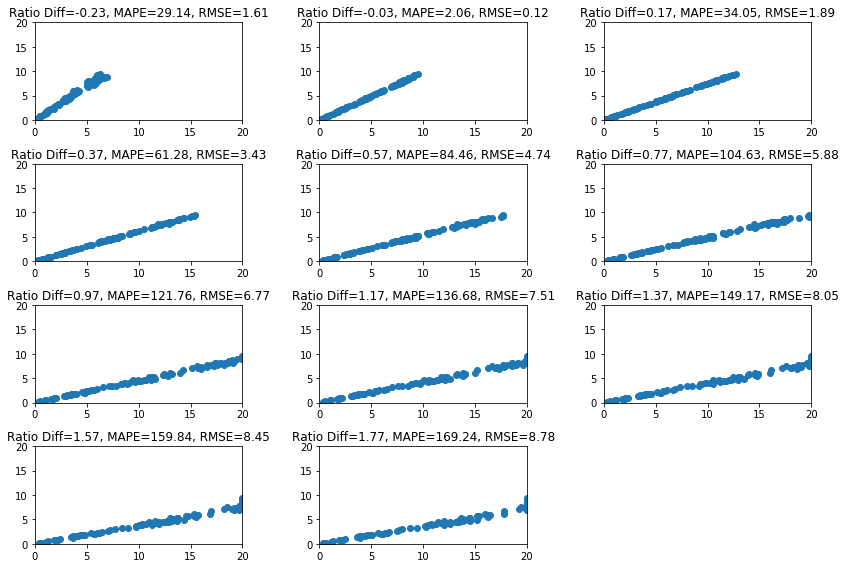

In [15]:
#Now, look at c_s
make_plots_w_err_rating(var_cs, .1, 2.2, .2, "True_Xi", "Input_Xi", "Ratio Diff=")

In [ ]:
#ms, ks, cs - matter much more than m_u and k_u
#thus... we will have to generate a lot of different combinations for those three, and hope that the ratios 
#from the textbook actually do have some resemblance to reality
#